In [2561]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ftu-table-b/02_DataDescription.xlsx
/kaggle/input/ftu-table-b/03_Item_Information_Data.csv
/kaggle/input/ftu-table-b/03_Shelf_Information_Data.csv
/kaggle/input/ftu-table-b/03_Customer_Behavior_Data.csv


In [2562]:
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

In [2563]:
Customer_Behavior=pd.read_csv('/kaggle/input/ftu-table-b/03_Customer_Behavior_Data.csv')
Item_Information=pd.read_csv('/kaggle/input/ftu-table-b/03_Item_Information_Data.csv')
Shelf_Information=pd.read_csv('/kaggle/input/ftu-table-b/03_Shelf_Information_Data.csv')

In [2564]:
Customer_Behavior

,Shelf ID,Person ID,Timestamp,Age,Gender,Height,Weight,Married status,Moving speed (m/s),Item ID,Looking at item (s),Holding the item (s),Holding the bag,Picking up item,Returning item,Putting item into bag,Taking item out of bag,Putting item into bag in the 2nd time
0,4,1,1720260000,52,Female,162,41,Married,0.19,16,27,36,True,True,False,False,False,True
1,4,1,1720260120,52,Female,162,41,Married,0.49,5,22,17,True,True,False,True,True,True
2,4,1,1720260300,52,Female,162,41,Married,0.36,4,25,39,True,True,True,True,True,False
3,4,1,1720260360,52,Female,162,41,Married,0.64,8,21,35,True,True,True,False,False,False
4,4,1,1720260480,52,Female,162,41,Married,0.13,6,27,16,True,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15389,2,1500,1720151340,52,Female,154,44,Single,0.52,4,32,35,False,True,False,True,True,True
15390,3,1500,1720151640,52,Female,154,44,Single,0.85,3,30,28,False,True,False,True,True,True
15391,3,1500,1720151760,52,Female,154,44,Single,0.76,21,54,56,False,True,False,False,True,False
15392,3,1500,1720151880,52,Female,154,44,Single,1.41,13,16,25,False,True,False,False,True,True


In [2565]:
Item_Information.head(60)

,Shelf ID,Item ID,Name,Origin,Location,Weight (g),Price,NSX,HSD,Marketing strategy,Discount,Rate
0,0,0,Bánh Oreo,Vietnam,Cao,120.0,"17,500 ₫",2023-11-14,2024-10-17,False,10,4
1,0,1,Bánh Chocopie,Vietnam,Cao,396.0,"48,000 ₫",2023-10-07,2024-09-16,False,0,3
2,0,2,Kẹo cao su Cool Air Fresh,Vietnam,Trung bình,40.0,"40,000 ₫",2024-06-02,2026-06-02,False,0,3
3,0,3,Bánh mỳ chà bông Kinh đô,Vietnam,Trung bình,80.0,"13,400 ₫",2024-05-02,2026-05-02,False,0,3
4,0,4,Bánh trứng Custard,Thái Lan,Trung bình,46.0,"17,000 ₫",2023-10-30,2024-04-16,True,10,4
5,0,5,Hạt hướng dương Chacheer,Vietnam,Trung bình,130.0,"25,000 ₫",2024-08-05,2024-11-24,False,5,3
6,0,6,Bim bim Oishi,Vietnam,Trung bình,70.0,"12,000 ₫",2024-06-25,2025-05-08,False,5,5
7,0,7,Snack khoai tây Lays,Vietnam,Trung bình,90.0,"22,000 ₫",2024-04-13,2024-09-25,False,10,3
8,0,8,Bánh gạo Richi,Vietnam,Cao,168.0,"39,000 ₫",2023-10-03,2024-01-11,False,0,4
9,0,9,Socola trứng Kinder,Ý,Thấp,20.0,"28,500 ₫",2023-11-01,2024-11-30,False,10,4


In [2566]:
Shelf_Information

,Shelf ID,Description,Location_x (center),Location_y (center),Width,Height,Length,Number of items,Shape
0,0,Quầy bánh kẹo,1100,550,300,180,300,13,Quầy tròn
1,1,Quầy hoá mỹ phẩm,350,500,100,180,400,18,Kệ hàng
2,2,Quầy sữa,600,400,100,180,600,9,Kệ hàng
3,3,Quầy thực phẩm,1450,400,100,180,600,25,Kệ hàng
4,4,Quầy gia vị,1100,150,500,180,100,19,Kệ hàng
5,5,Quầy gia dụng,350,950,700,180,100,16,Kệ hàng
6,6,Quầy sách và đồ chơi,50,400,100,180,600,16,Kệ hàng
7,7,Quầy đông lạnh,1150,950,700,180,100,16,Kệ hàng


In [2567]:
Customer_Behavior.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15394 entries, 0 to 15393
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Shelf ID                               15394 non-null  int64  
 1   Person ID                              15394 non-null  int64  
 2   Timestamp                              15394 non-null  int64  
 3   Age                                    15394 non-null  int64  
 4   Gender                                 15394 non-null  object 
 5   Height                                 15394 non-null  int64  
 6   Weight                                 15394 non-null  int64  
 7   Married status                         15394 non-null  object 
 8   Moving speed (m/s)                     15394 non-null  float64
 9   Item ID                                15394 non-null  int64  
 10  Looking at item (s)                    15394 non-null  int64  
 11  Ho

In [2568]:
Customer_Behavior.isnull().sum()

Shelf ID                                    0
Person ID                                   0
Timestamp                                   0
Age                                         0
Gender                                      0
Height                                      0
Weight                                      0
Married status                              0
Moving speed (m/s)                          0
Item ID                                     0
Looking at item (s)                         0
Holding the item (s)                        0
Holding the bag                             0
Picking up item                             0
Returning item                              0
Putting item into bag                    1338
Taking item out of bag                   1942
Putting item into bag in the 2nd time    2671
dtype: int64

In [2569]:
Shelf_Information.isnull().sum()

Shelf ID               0
Description            0
Location_x (center)    0
Location_y (center)    0
Width                  0
Height                 0
Length                 0
Number of items        0
Shape                  0
dtype: int64

In [2570]:
Item_Information.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Shelf ID            134 non-null    int64  
 1   Item ID             134 non-null    int64  
 2   Name                134 non-null    object 
 3   Origin              134 non-null    object 
 4   Location            134 non-null    object 
 5   Weight (g)          110 non-null    float64
 6   Price               134 non-null    object 
 7   NSX                 100 non-null    object 
 8   HSD                 100 non-null    object 
 9   Marketing strategy  134 non-null    bool   
 10  Discount            134 non-null    int64  
 11  Rate                134 non-null    int64  
dtypes: bool(1), float64(1), int64(4), object(6)
memory usage: 11.8+ KB


In [2571]:
Item_Information.isnull().sum()

Shelf ID               0
Item ID                0
Name                   0
Origin                 0
Location               0
Weight (g)            24
Price                  0
NSX                   34
HSD                   34
Marketing strategy     0
Discount               0
Rate                   0
dtype: int64

In [2572]:
labels=Shelf_Information['Shelf ID']

In [2573]:
Shelf_Information.columns
x=Shelf_Information['Location_x (center)']
y=Shelf_Information['Location_y (center)']

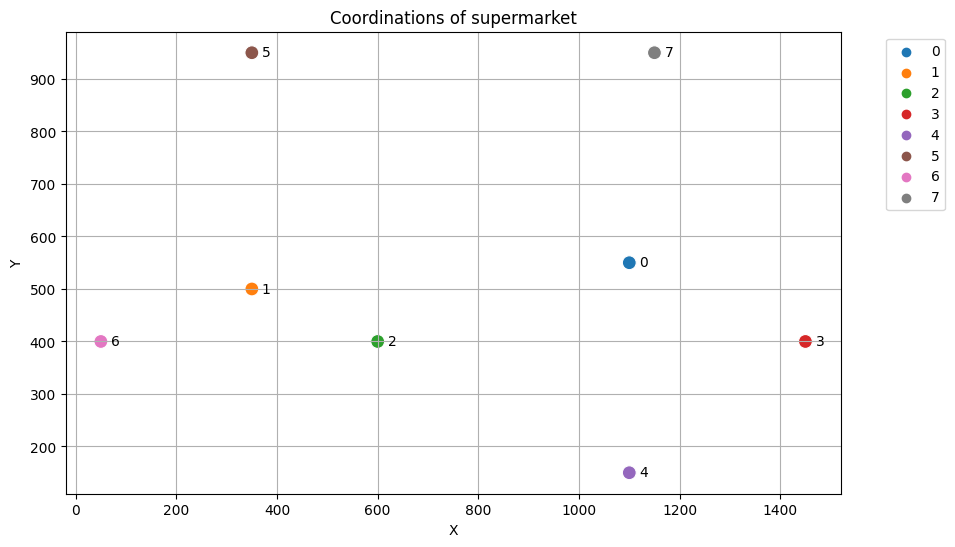

In [2574]:
plt.figure(figsize=(10,6))
sns.scatterplot(x= Shelf_Information['Location_x (center)'],y=Shelf_Information['Location_y (center)'],hue=labels, palette='tab10',s=100)

plt.title('Coordinations of supermarket')
plt.xlabel('X')
plt.ylabel('Y')

for i in range(len(Shelf_Information)):
    plt.text(x=x[i]+20,y=y[i],s=labels[i],fontsize=10,ha='left',va='center')
    
## ha stands for "horizontal alignment". 'left' means that the text will be aligned to the left of the x-coordinate.
## va stands for "vertical alignment". 'center' means that the text will be vertically centered on the y-coordinate.

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

# **Problem 1**

In [2575]:
Customer_Behavior['time_to_look_and_hold']=Customer_Behavior['Looking at item (s)']+Customer_Behavior['Holding the item (s)']

In [2576]:
Customer_Behavior['time_to_look_and_hold']

0         63
1         39
2         64
3         56
4         43
        ... 
15389     67
15390     58
15391    110
15392     41
15393     54
Name: time_to_look_and_hold, Length: 15394, dtype: int64

In [2577]:
Customer_Behavior['time_to_look_and_hold'].argmax()

975

In [2578]:
Merge_Data=pd.merge(Customer_Behavior,Item_Information,on='Item ID',how='outer')

In [2579]:
Merge_Data

,Shelf ID_x,Person ID,Timestamp,Age,Gender,Height,Weight,Married status,Moving speed (m/s),Item ID,...,Name,Origin,Location,Weight (g),Price,NSX,HSD,Marketing strategy,Discount,Rate
0,0,4,1720262340,70,Male,175,77,Married,1.37,0,...,Bánh Oreo,Vietnam,Cao,120.0,"17,500 ₫",2023-11-14,2024-10-17,False,10,4
1,0,4,1720262340,70,Male,175,77,Married,1.37,0,...,Dầu gội XMen,Vietnam,Thấp,180.0,"70,000 ₫",2024-08-04,2024-09-10,False,5,5
2,0,4,1720262340,70,Male,175,77,Married,1.37,0,...,Lốc 4 hộp sữa tươi Vinamilk 100% ít đường,Vietnam,Trung bình,180.0,"32,500 ₫",2023-08-25,2023-12-05,False,0,3
3,0,4,1720262340,70,Male,175,77,Married,1.37,0,...,Ðậu xanh,Vietnam,Thấp,150.0,"12,000 ₫",2024-01-09,2024-05-19,False,0,3
4,0,4,1720262340,70,Male,175,77,Married,1.37,0,...,Nước mắm Chinsu,Vietnam,Cao,720.0,"52,000 ₫",2024-02-20,2024-10-24,False,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110675,3,1279,1720126920,40,Male,174,81,Married,0.45,24,...,Sprite,Vietnam,Trung bình,600.0,"10,300 ₫",2024-02-20,2024-10-24,False,10,3
110676,3,1324,1720057380,56,Female,155,45,Married,0.87,24,...,Sprite,Vietnam,Trung bình,600.0,"10,300 ₫",2024-02-20,2024-10-24,False,10,3
110677,3,1371,1720185540,37,Male,170,80,Married,0.60,24,...,Sprite,Vietnam,Trung bình,600.0,"10,300 ₫",2024-02-20,2024-10-24,False,10,3
110678,3,1457,1720221060,26,Male,171,60,Single,1.32,24,...,Sprite,Vietnam,Trung bình,600.0,"10,300 ₫",2024-02-20,2024-10-24,False,10,3


In [2580]:
Merge_Data['time_to_look_and_hold']=Merge_Data['Looking at item (s)']+Merge_Data['Holding the item (s)']

In [2581]:
Merge_Data.columns

Index(['Shelf ID_x', 'Person ID', 'Timestamp', 'Age', 'Gender', 'Height',
       'Weight', 'Married status', 'Moving speed (m/s)', 'Item ID',
       'Looking at item (s)', 'Holding the item (s)', 'Holding the bag',
       'Picking up item', 'Returning item', 'Putting item into bag',
       'Taking item out of bag', 'Putting item into bag in the 2nd time',
       'time_to_look_and_hold', 'Shelf ID_y', 'Name', 'Origin', 'Location',
       'Weight (g)', 'Price', 'NSX', 'HSD', 'Marketing strategy', 'Discount ',
       'Rate'],
      dtype='object')

In [2582]:
df = Customer_Behavior[['Shelf ID','Item ID', 'time_to_look_and_hold']]

In [2583]:
df['Combined_ID']=df['Shelf ID'].astype(str)+'/'+df['Item ID'].astype(str)

/tmp/ipykernel_36/4247394765.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Combined_ID']=df['Shelf ID'].astype(str)+'/'+df['Item ID'].astype(str)


In [2584]:
df

,Shelf ID,Item ID,time_to_look_and_hold,Combined_ID
0,4,16,63,4/16
1,4,5,39,4/5
2,4,4,64,4/4
3,4,8,56,4/8
4,4,6,43,4/6
...,...,...,...,...
15389,2,4,67,2/4
15390,3,3,58,3/3
15391,3,21,110,3/21
15392,3,13,41,3/13


In [2585]:
new_df=df.groupby('Combined_ID')['time_to_look_and_hold'].agg(['sum', 'mean', 'count'])

In [2586]:
new_df

,sum,mean,count
Combined_ID,,,
0/0,10989,53.086957,207
0/1,11860,53.909091,220
0/10,10119,52.979058,191
0/11,12228,53.631579,228
0/12,10394,53.854922,193
...,...,...,...
7/5,9995,53.736559,186
7/6,22896,109.028571,210
7/7,22896,109.028571,210


In [2587]:
sorted_df=new_df.sort_values(by='sum', ascending=False)

In [2588]:
sorted_df

,sum,mean,count
Combined_ID,,,
7/7,22896,109.028571,210
7/6,22896,109.028571,210
2/8,13939,60.081897,232
0/6,13866,59.510730,233
0/7,13362,56.859574,235
...,...,...,...
1/14,1669,13.246032,126
6/14,1463,27.603774,53
6/3,1421,24.929825,57


In [2589]:
max_value_1=new_df['sum'].max()

In [2590]:
max_ids=new_df[new_df['sum']==max_value_1].index.tolist()

In [2591]:
max_ids

['7/6', '7/7']

quầy 5 và id 1

In [2592]:
new_df.loc['7/7','sum']

22896

In [2593]:
Customer_Behavior.loc[(Customer_Behavior['Shelf ID']==5) & (Customer_Behavior['Item ID']==1)]

,Shelf ID,Person ID,Timestamp,Age,Gender,Height,Weight,Married status,Moving speed (m/s),Item ID,Looking at item (s),Holding the item (s),Holding the bag,Picking up item,Returning item,Putting item into bag,Taking item out of bag,Putting item into bag in the 2nd time,time_to_look_and_hold
63,5,8,1720265220,18,Male,177,61,Married,0.19,1,56,50,True,True,False,True,False,True,106
275,5,29,1720273620,69,Male,169,58,Married,1.31,1,58,55,False,True,False,True,False,False,113
498,5,45,1720284420,53,Male,177,67,Married,0.75,1,58,53,True,True,True,False,NaN,True,111
805,5,75,1720295520,48,Female,147,54,Married,1.20,1,53,56,True,True,False,True,False,False,109
1213,5,114,1720224900,46,Male,169,75,Married,0.80,1,52,56,True,True,False,True,False,NaN,108
2318,5,224,1720270560,45,Male,176,55,Married,1.22,1,55,57,False,True,False,True,False,False,112
3043,5,285,1720296180,73,Female,154,40,Married,0.27,1,57,50,True,True,False,False,True,False,107
3167,5,296,1720302180,36,Female,151,52,Single,1.04,1,59,54,True,True,False,True,False,NaN,113
3409,5,317,1720225500,36,Male,179,66,Married,0.89,1,56,53,True,True,True,True,True,True,109
4021,5,380,1720256340,32,Female,159,42,Single,0.60,1,58,53,True,True,False,True,False,False,111


In [2594]:
Item_Information.loc[(Item_Information['Shelf ID']==7)&(Item_Information['Item ID']==7)]

,Shelf ID,Item ID,Name,Origin,Location,Weight (g),Price,NSX,HSD,Marketing strategy,Discount,Rate
125,7,7,Sữa chua uống Probi,Vietnam,Trung bình,130.0,"36,000 ₫",2024-02-16,2024-08-28,False,5,5


In [2595]:
problem1_df=sorted_df.head()

In [2596]:
problem1_df

,sum,mean,count
Combined_ID,,,
7/7,22896,109.028571,210
7/6,22896,109.028571,210
2/8,13939,60.081897,232
0/6,13866,59.510730,233
0/7,13362,56.859574,235


In [2597]:
def problem1(df1,df2):
    results=[]
    for index in df1.index:
        if isinstance(index, int):
            index = str(index)
        id_1,id_2=map(int,index.split('/'))
        result=df2.loc[(df2['Shelf ID']==id_1)&(df2['Item ID']==id_2)]

        results.append(result)
    print(results)

In [2598]:
problem1(problem1_df,Item_Information)

[     Shelf ID  Item ID                 Name   Origin    Location  Weight (g)  \
125         7        7  Sữa chua uống Probi  Vietnam  Trung bình       130.0   

        Price         NSX         HSD  Marketing strategy  Discount   Rate  
125  36,000 ₫  2024-02-16  2024-08-28               False          5     5  ,      Shelf ID  Item ID                  Name   Origin    Location  Weight (g)  \
124         7        6  Sữa chua uống Yakult  Vietnam  Trung bình        65.0   

        Price         NSX         HSD  Marketing strategy  Discount   Rate  
124  26,000 ₫  2024-03-26  2024-09-18               False          0     3  ,     Shelf ID  Item ID         Name   Origin Location  Weight (g)     Price  \
39         2        8  Sữa ông thọ  Vietnam     Thấp       380.0  31,500 ₫   

           NSX         HSD  Marketing strategy  Discount   Rate  
39  2024-06-03  2025-04-29               False          0     3  ,    Shelf ID  Item ID           Name   Origin    Location  Weight (g)  \
6  

# **Problem 2**

In [2599]:
Customer_Behavior.columns

Index(['Shelf ID', 'Person ID', 'Timestamp', 'Age', 'Gender', 'Height',
       'Weight', 'Married status', 'Moving speed (m/s)', 'Item ID',
       'Looking at item (s)', 'Holding the item (s)', 'Holding the bag',
       'Picking up item', 'Returning item', 'Putting item into bag',
       'Taking item out of bag', 'Putting item into bag in the 2nd time',
       'time_to_look_and_hold'],
      dtype='object')

In [2600]:
problem2_df=Customer_Behavior[['Picking up item', 'Returning item']]
problem2_df['Combined_ID']=Customer_Behavior['Shelf ID'].astype(str)+'/'+Customer_Behavior['Item ID'].astype(str)

/tmp/ipykernel_36/4194057823.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  problem2_df['Combined_ID']=Customer_Behavior['Shelf ID'].astype(str)+'/'+Customer_Behavior['Item ID'].astype(str)


In [2601]:
problem2_df.set_index('Combined_ID',inplace=True)

In [2602]:
problem2_df

,Picking up item,Returning item
Combined_ID,,
4/16,True,False
4/5,True,False
4/4,True,True
4/8,True,True
4/6,True,False
...,...,...
2/4,True,False
3/3,True,False
3/21,True,False


In [2603]:
problem2_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15394 entries, 4/16 to 3/7
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Picking up item  15394 non-null  bool 
 1   Returning item   15394 non-null  bool 
dtypes: bool(2)
memory usage: 150.3+ KB


In [2604]:
def problem2(df):
    df = df[(df['Picking up item']==True) & (df['Returning item']==True)]
    return df
problem2_df_filtered=problem2(problem2_df)

In [2605]:
prb2=problem2_df_filtered.groupby('Combined_ID')['Picking up item'].agg(['sum', 'mean', 'count'])
prb2

,sum,mean,count
Combined_ID,,,
0/0,105,1.0,105
0/1,114,1.0,114
0/10,85,1.0,85
0/11,109,1.0,109
0/12,96,1.0,96
...,...,...,...
7/5,99,1.0,99
7/6,98,1.0,98
7/7,89,1.0,89


In [2606]:
prb2_end=prb2.sort_values(by='sum', ascending=False).head()
prb2_end

,sum,mean,count
Combined_ID,,,
2/2,134,1.0,134
0/7,127,1.0,127
7/12,117,1.0,117
7/14,116,1.0,116
7/2,114,1.0,114


In [2607]:
problem1(prb2_end, Item_Information)

[    Shelf ID  Item ID                           Name   Origin    Location  \
33         2        2  4 hộp sữa lúa mạch Milo 180ml  Vietnam  Trung bình   

    Weight (g)     Price         NSX         HSD  Marketing strategy  \
33       180.0  30,000 ₫  2023-08-16  2024-01-12               False   

    Discount   Rate  
33          0     5  ,    Shelf ID  Item ID                  Name   Origin    Location  Weight (g)  \
7         0        7  Snack khoai tây Lays  Vietnam  Trung bình        90.0   

      Price         NSX         HSD  Marketing strategy  Discount   Rate  
7  22,000 ₫  2024-04-13  2024-09-25               False         10     3  ,      Shelf ID  Item ID          Name   Origin Location  Weight (g)     Price  \
130         7       12  Mý ý SG Food  Vietnam     Thấp       250.0  27,000 ₫   

            NSX         HSD  Marketing strategy  Discount   Rate  
130  2024-02-05  2024-09-03               False          0     4  ,      Shelf ID  Item ID             Name   Origin

# **Problem 3**

In [2608]:
Customer_Behavior.tail(300)

,Shelf ID,Person ID,Timestamp,Age,Gender,Height,Weight,Married status,Moving speed (m/s),Item ID,Looking at item (s),Holding the item (s),Holding the bag,Picking up item,Returning item,Putting item into bag,Taking item out of bag,Putting item into bag in the 2nd time,time_to_look_and_hold
15094,1,1463,1720222740,48,Female,158,57,Married,1.23,13,3,4,True,True,False,True,False,False,7
15095,1,1463,1720222980,48,Female,158,57,Married,1.03,1,20,15,True,True,False,True,False,True,35
15096,1,1463,1720223100,48,Female,158,57,Married,0.58,3,30,26,True,True,False,True,False,NaN,56
15097,0,1463,1720223280,48,Female,158,57,Married,0.33,10,16,20,True,True,False,False,True,True,36
15098,1,1463,1720223340,48,Female,158,57,Married,0.17,12,35,20,True,True,True,False,NaN,False,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15389,2,1500,1720151340,52,Female,154,44,Single,0.52,4,32,35,False,True,False,True,True,True,67
15390,3,1500,1720151640,52,Female,154,44,Single,0.85,3,30,28,False,True,False,True,True,True,58
15391,3,1500,1720151760,52,Female,154,44,Single,0.76,21,54,56,False,True,False,False,True,False,110
15392,3,1500,1720151880,52,Female,154,44,Single,1.41,13,16,25,False,True,False,False,True,True,41


In [2609]:
Customer_Behavior.isnull().sum()

Shelf ID                                    0
Person ID                                   0
Timestamp                                   0
Age                                         0
Gender                                      0
Height                                      0
Weight                                      0
Married status                              0
Moving speed (m/s)                          0
Item ID                                     0
Looking at item (s)                         0
Holding the item (s)                        0
Holding the bag                             0
Picking up item                             0
Returning item                              0
Putting item into bag                    1338
Taking item out of bag                   1942
Putting item into bag in the 2nd time    2671
time_to_look_and_hold                       0
dtype: int64

In [2610]:
Customer_Behavior['Holding the bag'].value_counts()

Holding the bag
True     14170
False     1224
Name: count, dtype: int64

In [2611]:
Holding_The_Bag_df=Customer_Behavior[['Person ID','Holding the bag']]
Holding_The_Bag_df=Holding_The_Bag_df.groupby('Person ID')['Holding the bag'].max().reset_index()
Holding_The_Bag_df

,Person ID,Holding the bag
0,1,True
1,2,True
2,3,True
3,4,False
4,5,True
...,...,...
1495,1496,False
1496,1497,False
1497,1498,False
1498,1499,False


In [2612]:
holding_the_bags_counts=Holding_The_Bag_df['Holding the bag'].value_counts()
holding_the_bags_counts

Holding the bag
True     1124
False     376
Name: count, dtype: int64

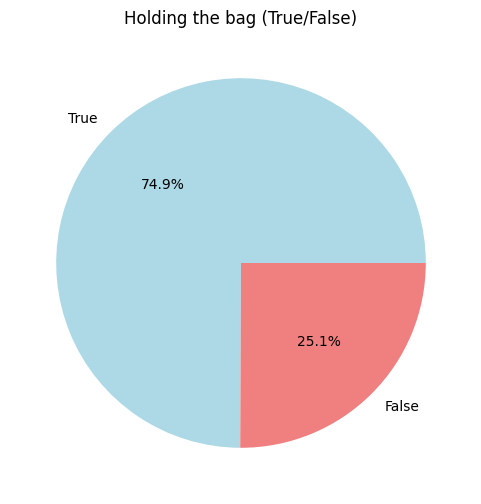

In [2613]:
plt.figure(figsize=(6,6))
plt.pie(holding_the_bags_counts, labels=['True', 'False'], autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
plt.title('Holding the bag (True/False)')
plt.show()

***Có thể hiểu về việc sử dụng holding the bag liên quan đến việc mua hàng nhanh hay chậm, những người cầm giỏ hàng có xu hướng đi sắm đồ, còn những người không cầm lại có xu hướng mua nhanh hoặc mua những món hàng nhỏ***

***Đối với việc xử lý dữ liệu dư thừa ở 3 cột Putting item into bag,Taking item out of bag,Putting item into bag in the 2nd time, chúng ta sẽ xem xét các yếu tố ở 2 cột Picking up item và Returning item trước đã, vì nếu cầm hàng rồi trả lại thì sẽ không có chuyện cho vào giỏ, nên sẽ đánh False hết, hoặc đối với khách hàng ko mang giỏ thì cũng đánh False hết***

In [2614]:
Customer_Behavior.loc[Customer_Behavior['Holding the bag']==False,['Putting item into bag','Taking item out of bag','Putting item into bag in the 2nd time']]=False

In [2615]:
Customer_Behavior.isnull().sum()

Shelf ID                                    0
Person ID                                   0
Timestamp                                   0
Age                                         0
Gender                                      0
Height                                      0
Weight                                      0
Married status                              0
Moving speed (m/s)                          0
Item ID                                     0
Looking at item (s)                         0
Holding the item (s)                        0
Holding the bag                             0
Picking up item                             0
Returning item                              0
Putting item into bag                    1229
Taking item out of bag                   1777
Putting item into bag in the 2nd time    2447
time_to_look_and_hold                       0
dtype: int64

In [2616]:
Customer_Behavior.loc[Customer_Behavior['Picking up item']==False]

,Shelf ID,Person ID,Timestamp,Age,Gender,Height,Weight,Married status,Moving speed (m/s),Item ID,Looking at item (s),Holding the item (s),Holding the bag,Picking up item,Returning item,Putting item into bag,Taking item out of bag,Putting item into bag in the 2nd time,time_to_look_and_hold
299,6,31,1720275660,48,Female,148,49,Married,0.92,10,20,0,True,False,False,False,True,True,20
1065,6,97,1720303200,49,Female,148,59,Married,0.23,1,37,0,True,False,False,False,False,True,37
2293,6,221,1720270320,31,Male,177,81,Single,0.39,16,27,0,True,False,True,NaN,False,False,27
2914,6,273,1720293780,32,Female,166,59,Single,1.19,6,31,0,True,False,True,True,False,True,31
3049,6,285,1720297140,73,Female,154,40,Married,0.90,7,31,0,True,False,False,False,True,False,31
3671,6,341,1720236120,58,Male,177,70,Married,1.17,1,16,0,True,False,True,False,True,True,16
5375,6,506,1720373100,41,Female,150,42,Single,1.48,13,24,0,True,False,True,False,False,True,24
5378,6,506,1720373520,41,Female,150,42,Single,1.21,3,26,0,True,False,False,True,False,False,26
5816,6,548,1720390560,51,Female,149,42,Married,1.10,17,31,0,True,False,False,False,True,False,31
8067,6,758,1720395180,38,Female,150,53,Married,0.65,2,26,0,True,False,False,False,NaN,False,26


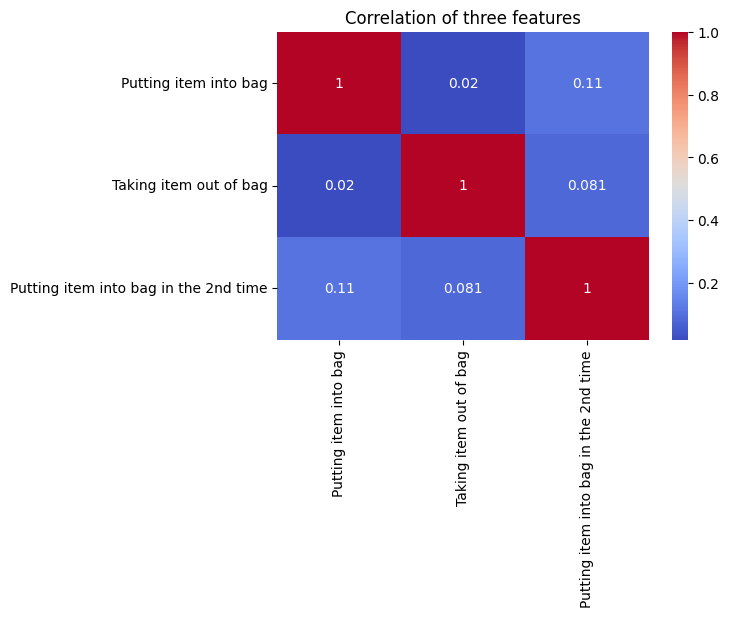

In [2617]:
corr_matrix = Customer_Behavior[['Putting item into bag', 'Taking item out of bag', 'Putting item into bag in the 2nd time']].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', cbar=True)
plt.title('Correlation of three features')
plt.show()

***Các chỉ số tương quan đều rất nhỏ, vì thế sự độc lập của 3 feature này khá khác nhau, cho nên có thể thấy các giá trị của chúng dường như không ảnh hưởng đến nhau***

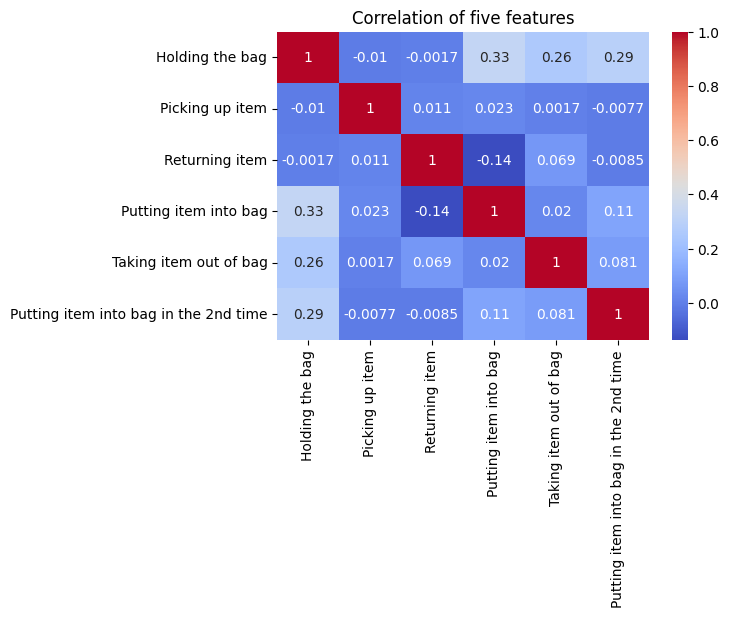

In [2618]:
corr_matrix = Customer_Behavior[['Holding the bag','Picking up item','Returning item','Putting item into bag', 'Taking item out of bag', 'Putting item into bag in the 2nd time']].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', cbar=True)
plt.title('Correlation of five features')
plt.show()

***Các trường gần như không liên quan quá nhiều đến nhau, cho nên tôi sẽ fillna những giá trị khuyết***

In [2619]:
Customer_Behavior['Putting item into bag']=Customer_Behavior['Putting item into bag'].apply(lambda x: np.random.choice([False,True]) if pd.isna(x) else x)
Customer_Behavior['Taking item out of bag']=Customer_Behavior['Taking item out of bag'].apply(lambda x: np.random.choice([False,True]) if pd.isna(x) else x)
Customer_Behavior['Putting item into bag in the 2nd time']=Customer_Behavior['Putting item into bag in the 2nd time'].apply(lambda x: np.random.choice([False,True]) if pd.isna(x) else x)

In [2620]:
Customer_Behavior.isnull().sum()

Shelf ID                                 0
Person ID                                0
Timestamp                                0
Age                                      0
Gender                                   0
Height                                   0
Weight                                   0
Married status                           0
Moving speed (m/s)                       0
Item ID                                  0
Looking at item (s)                      0
Holding the item (s)                     0
Holding the bag                          0
Picking up item                          0
Returning item                           0
Putting item into bag                    0
Taking item out of bag                   0
Putting item into bag in the 2nd time    0
time_to_look_and_hold                    0
dtype: int64

***Chỉnh sửa Timestamp***

In [2621]:
Customer_Behavior['Timestamp'] = pd.to_datetime(Customer_Behavior['Timestamp'], unit='s')
Customer_Behavior

,Shelf ID,Person ID,Timestamp,Age,Gender,Height,Weight,Married status,Moving speed (m/s),Item ID,Looking at item (s),Holding the item (s),Holding the bag,Picking up item,Returning item,Putting item into bag,Taking item out of bag,Putting item into bag in the 2nd time,time_to_look_and_hold
0,4,1,2024-07-06 10:00:00,52,Female,162,41,Married,0.19,16,27,36,True,True,False,False,False,True,63
1,4,1,2024-07-06 10:02:00,52,Female,162,41,Married,0.49,5,22,17,True,True,False,True,True,True,39
2,4,1,2024-07-06 10:05:00,52,Female,162,41,Married,0.36,4,25,39,True,True,True,True,True,False,64
3,4,1,2024-07-06 10:06:00,52,Female,162,41,Married,0.64,8,21,35,True,True,True,False,False,False,56
4,4,1,2024-07-06 10:08:00,52,Female,162,41,Married,0.13,6,27,16,True,True,False,False,False,True,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15389,2,1500,2024-07-05 03:49:00,52,Female,154,44,Single,0.52,4,32,35,False,True,False,False,False,False,67
15390,3,1500,2024-07-05 03:54:00,52,Female,154,44,Single,0.85,3,30,28,False,True,False,False,False,False,58
15391,3,1500,2024-07-05 03:56:00,52,Female,154,44,Single,0.76,21,54,56,False,True,False,False,False,False,110
15392,3,1500,2024-07-05 03:58:00,52,Female,154,44,Single,1.41,13,16,25,False,True,False,False,False,False,41


In [2622]:
Item_Information.isnull().sum()

Shelf ID               0
Item ID                0
Name                   0
Origin                 0
Location               0
Weight (g)            24
Price                  0
NSX                   34
HSD                   34
Marketing strategy     0
Discount               0
Rate                   0
dtype: int64

***Theo như thực tế, NSX và HSD của các đơn hàng thường có xu hướng nhập cùng nhau, vậy nên chúng ta sẽ sử dụng NSX và HSD chung nhất để fill vào dữ liệu, bởi vì trường này cũng ko ảnh hưởng quá nhiều đến bài toán, chẳng có siêu thị nào bán đồ hết hạn cả, đơn giản tôi ko muốn bỏ những cột dữ liệu này vì có thể nó có ích ở đâu đó, tôi luôn tôn trọng những người thu thập dữ liệu, kể cả họ có ghi bừa***

In [2623]:
Item_Information['NSX'].fillna(Item_Information['NSX'].mode()[0],inplace=True)
Item_Information['HSD'].fillna(Item_Information['HSD'].mode()[0],inplace=True)

/tmp/ipykernel_36/3368361725.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Item_Information['NSX'].fillna(Item_Information['NSX'].mode()[0],inplace=True)
/tmp/ipykernel_36/3368361725.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(v

In [2624]:
Item_Information.isnull().sum()

Shelf ID               0
Item ID                0
Name                   0
Origin                 0
Location               0
Weight (g)            24
Price                  0
NSX                    0
HSD                    0
Marketing strategy     0
Discount               0
Rate                   0
dtype: int64

***Về dữ liệu weight, nó cũng chẳng ảnh hưởng quá nhiều đến các bài toán phân tích, vì mỗi một sản phẩm lại có 1 mục tiêu và định hướng riêng do các hãng sản xuất, nhưng để bổ sung cho dữ liệu, tôi sẽ tra thông tin trên mạng và điền lại bởi vì chỉ có 24 mặt hàng bị khuyết và tôi ko thể dùng các khái niệm chung chung để điền vào được vì mỗi vật phẩm luôn khác nhau***

In [2625]:
Item_Information

,Shelf ID,Item ID,Name,Origin,Location,Weight (g),Price,NSX,HSD,Marketing strategy,Discount,Rate
0,0,0,Bánh Oreo,Vietnam,Cao,120.0,"17,500 ₫",2023-11-14,2024-10-17,False,10,4
1,0,1,Bánh Chocopie,Vietnam,Cao,396.0,"48,000 ₫",2023-10-07,2024-09-16,False,0,3
2,0,2,Kẹo cao su Cool Air Fresh,Vietnam,Trung bình,40.0,"40,000 ₫",2024-06-02,2026-06-02,False,0,3
3,0,3,Bánh mỳ chà bông Kinh đô,Vietnam,Trung bình,80.0,"13,400 ₫",2024-05-02,2026-05-02,False,0,3
4,0,4,Bánh trứng Custard,Thái Lan,Trung bình,46.0,"17,000 ₫",2023-10-30,2024-04-16,True,10,4
...,...,...,...,...,...,...,...,...,...,...,...,...
129,7,11,Pizza kitkool,Vietnam,Thấp,140.0,"33,000 ₫",2024-04-16,2024-06-10,False,0,4
130,7,12,Mý ý SG Food,Vietnam,Thấp,250.0,"27,000 ₫",2024-02-05,2024-09-03,False,0,4
131,7,13,Thanh cua Akira,Nhật Bản,Thấp,200.0,"58,500 ₫",2023-10-16,2023-12-19,False,0,4
132,7,14,Nước lẩu Barona,Vietnam,Thấp,180.0,"32,000 ₫",2023-12-02,2024-03-02,False,0,4


In [2626]:
Item_Information.loc[20,'Weight (g)']=50
Item_Information.loc[21,'Weight (g)']=100
Item_Information.loc[22,'Weight (g)']=30
Item_Information.loc[23,'Weight (g)']=550
Item_Information.loc[24,'Weight (g)']=75
Item_Information.loc[25,'Weight (g)']=155
Item_Information.loc[26,'Weight (g)']=800
Item_Information.loc[27,'Weight (g)']=750
Item_Information.loc[28,'Weight (g)']=850
Item_Information.loc[29,'Weight (g)']=40
Item_Information.loc[30,'Weight (g)']=45
Item_Information.loc[100,'Weight (g)']=50
Item_Information.loc[101,'Weight (g)']=210
Item_Information.loc[119,'Weight (g)']=78

In [2627]:
book_ids = [106, 107, 108, 109, 110, 111, 112, 113, 115, 117]

Item_Information.loc[Item_Information.index.isin(book_ids), 'Weight (g)'] = 300

In [2628]:
Item_Information.isnull().sum()

Shelf ID              0
Item ID               0
Name                  0
Origin                0
Location              0
Weight (g)            0
Price                 0
NSX                   0
HSD                   0
Marketing strategy    0
Discount              0
Rate                  0
dtype: int64

******

***Chúng ta sẽ tạo thêm 1 feature được gọi là mua hàng (Bought) để chỉ định những mặt hàng đã được mua bởi khách hàng đó, chúng ta sẽ có 2 trường hợp của người mua hàng:***

* Người mua hàng với giỏ (bag): Holding the bag = True, và 3 trường Putting item into bag,Taking item out of bag,Putting item into bag in the 2nd time sẽ ảnh hưởng chính đến việc khách hàng có muốn mua hay không do đều có thành phần giỏ ở bên trong. Putting item into bag
* Người mua hàng không có giỏ (bag): 3 trường nêu trên không quá quan trọng với họ, các trường để xem xét là picking up item và returning item. Nếu picking up item=True và returning item=False thì được xem là mua hàng. Ngoài ra, nếu cầm mặt hàng hơn 30s cũng được coi là mua hàng.

In [2629]:
Customer_Behavior.loc[Customer_Behavior['Holding the item (s)']==0]

,Shelf ID,Person ID,Timestamp,Age,Gender,Height,Weight,Married status,Moving speed (m/s),Item ID,Looking at item (s),Holding the item (s),Holding the bag,Picking up item,Returning item,Putting item into bag,Taking item out of bag,Putting item into bag in the 2nd time,time_to_look_and_hold
207,1,22,2024-07-06 13:10:00,46,Female,162,51,Married,0.84,14,7,0,True,True,False,True,False,False,7
299,6,31,2024-07-06 14:21:00,48,Female,148,49,Married,0.92,10,20,0,True,False,False,False,True,True,20
863,1,79,2024-07-06 20:22:00,51,Female,148,57,Married,0.91,13,13,0,True,True,False,True,False,False,13
1065,6,97,2024-07-06 22:00:00,49,Female,148,59,Married,0.23,1,37,0,True,False,False,False,False,True,37
2228,1,213,2024-07-06 12:02:00,73,Male,173,80,Married,1.21,14,4,0,True,True,False,True,True,True,4
2293,6,221,2024-07-06 12:52:00,31,Male,177,81,Single,0.39,16,27,0,True,False,True,False,False,False,27
2914,6,273,2024-07-06 19:23:00,32,Female,166,59,Single,1.19,6,31,0,True,False,True,True,False,True,31
3049,6,285,2024-07-06 20:19:00,73,Female,154,40,Married,0.90,7,31,0,True,False,False,False,True,False,31
3267,1,308,2024-07-06 22:53:00,36,Female,152,56,Single,0.32,14,5,0,True,True,False,True,True,True,5
3555,1,330,2024-07-06 02:05:00,63,Female,164,49,Married,0.21,14,14,0,True,True,False,True,False,True,14


In [2630]:
def age_group(age):
    if 18 <= age <= 30:
        return 'Thiếu niên'
    elif 31 <= age <= 60:
        return 'Trung niên'
    else:
        return 'Cao tuổi'
    
Customer_Behavior['Age_Group']=Customer_Behavior['Age'].apply(age_group)

In [2631]:
def bought(dataframe):
    if dataframe['Holding the bag']==True:
        if dataframe['Putting item into bag']==True:
            if dataframe['Taking item out of bag']==False:
                return True
            else:
                if dataframe['Putting item into bag in the 2nd time']==True:
                    return True
                else:
                    return False
        else:
            return False
    else:
        if dataframe['Picking up item']==True and dataframe['Returning item']==False:
            return True
        elif dataframe['Holding the item (s)']>30:
            return True
        else:
            return False

In [2632]:
Customer_Behavior['Bought']=Customer_Behavior.apply(bought,axis=1)
Customer_Behavior

,Shelf ID,Person ID,Timestamp,Age,Gender,Height,Weight,Married status,Moving speed (m/s),Item ID,...,Holding the item (s),Holding the bag,Picking up item,Returning item,Putting item into bag,Taking item out of bag,Putting item into bag in the 2nd time,time_to_look_and_hold,Age_Group,Bought
0,4,1,2024-07-06 10:00:00,52,Female,162,41,Married,0.19,16,...,36,True,True,False,False,False,True,63,Trung niên,False
1,4,1,2024-07-06 10:02:00,52,Female,162,41,Married,0.49,5,...,17,True,True,False,True,True,True,39,Trung niên,True
2,4,1,2024-07-06 10:05:00,52,Female,162,41,Married,0.36,4,...,39,True,True,True,True,True,False,64,Trung niên,False
3,4,1,2024-07-06 10:06:00,52,Female,162,41,Married,0.64,8,...,35,True,True,True,False,False,False,56,Trung niên,False
4,4,1,2024-07-06 10:08:00,52,Female,162,41,Married,0.13,6,...,16,True,True,False,False,False,True,43,Trung niên,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15389,2,1500,2024-07-05 03:49:00,52,Female,154,44,Single,0.52,4,...,35,False,True,False,False,False,False,67,Trung niên,True
15390,3,1500,2024-07-05 03:54:00,52,Female,154,44,Single,0.85,3,...,28,False,True,False,False,False,False,58,Trung niên,True
15391,3,1500,2024-07-05 03:56:00,52,Female,154,44,Single,0.76,21,...,56,False,True,False,False,False,False,110,Trung niên,True
15392,3,1500,2024-07-05 03:58:00,52,Female,154,44,Single,1.41,13,...,25,False,True,False,False,False,False,41,Trung niên,True


In [2633]:
problem3_df=Customer_Behavior[Customer_Behavior['Bought']==True][['Age_Group','Item ID','Shelf ID']]

In [2634]:
problem3_df['Combined_ID']=problem3_df['Shelf ID'].astype(str)+'/'+problem3_df['Item ID'].astype(str)
problem3_df.drop(columns=['Item ID','Shelf ID'], inplace=True)
problem3_df

,Age_Group,Combined_ID
1,Trung niên,4/5
5,Trung niên,4/5
7,Trung niên,7/1
9,Trung niên,7/11
11,Trung niên,2/6
...,...,...
15389,Trung niên,2/4
15390,Trung niên,3/3
15391,Trung niên,3/21
15392,Trung niên,3/13


In [2635]:
item_counts = problem3_df.groupby(['Age_Group', 'Combined_ID']).size().reset_index(name='Counts')

max_item_per_age_group = item_counts.loc[item_counts.groupby('Age_Group')['Counts'].idxmax()]

print(max_item_per_age_group)

      Age_Group Combined_ID  Counts
7      Cao tuổi         0/4      57
141  Thiếu niên         0/4      47
386  Trung niên         7/0      98


* 0/4: Bánh trứng Custard
* 2/1: Lốc 4 hộp sữa tươi ít đường TH true milk

# Problem 4

In [2636]:
problem4_df=Customer_Behavior[Customer_Behavior['Bought']==True][['Timestamp','Shelf ID','Item ID']]

In [2637]:
problem4_df['Combined_ID']=problem4_df['Shelf ID'].astype(str)+'/'+problem4_df['Item ID'].astype(str)
problem4_df.drop(columns=['Item ID','Shelf ID'], inplace=True)

In [2638]:
problem4_df.head(60)

,Timestamp,Combined_ID
1,2024-07-06 10:02:00,4/5
5,2024-07-06 10:12:00,4/5
7,2024-07-06 10:16:00,7/1
9,2024-07-06 10:19:00,7/11
11,2024-07-06 10:27:00,2/6
13,2024-07-06 10:33:00,2/1
19,2024-07-06 10:26:00,1/9
21,2024-07-06 10:31:00,2/7
23,2024-07-06 10:37:00,2/7
24,2024-07-06 10:38:00,2/8


In [2639]:
problem4_df['day_of_week']=problem4_df['Timestamp'].dt.day_name()

In [2640]:
problem4_df

,Timestamp,Combined_ID,day_of_week
1,2024-07-06 10:02:00,4/5,Saturday
5,2024-07-06 10:12:00,4/5,Saturday
7,2024-07-06 10:16:00,7/1,Saturday
9,2024-07-06 10:19:00,7/11,Saturday
11,2024-07-06 10:27:00,2/6,Saturday
...,...,...,...
15389,2024-07-05 03:49:00,2/4,Friday
15390,2024-07-05 03:54:00,3/3,Friday
15391,2024-07-05 03:56:00,3/21,Friday
15392,2024-07-05 03:58:00,3/13,Friday


In [2641]:
Item_Information['Combined_ID']=Item_Information['Shelf ID'].astype(str)+'/'+Item_Information['Item ID'].astype(str)
Item_Information.drop(columns=['Item ID','Shelf ID'], inplace=True)

In [2642]:
Item_Price_df=Item_Information[['Combined_ID','Price']]

In [2643]:
problem4_df=pd.merge(problem4_df,Item_Price_df,on='Combined_ID',how='inner')

In [2644]:
problem4_df['Price']=problem4_df['Price'].replace({'[₫,đ]': '',',':''},regex=True).astype(float)
problem4_df

,Timestamp,Combined_ID,day_of_week,Price
0,2024-07-06 10:02:00,4/5,Saturday,64500.0
1,2024-07-06 10:12:00,4/5,Saturday,64500.0
2,2024-07-06 10:16:00,7/1,Saturday,175000.0
3,2024-07-06 10:19:00,7/11,Saturday,33000.0
4,2024-07-06 10:27:00,2/6,Saturday,245000.0
...,...,...,...,...
7272,2024-07-05 03:49:00,2/4,Friday,410000.0
7273,2024-07-05 03:54:00,3/3,Friday,4400.0
7274,2024-07-05 03:56:00,3/21,Friday,104000.0
7275,2024-07-05 03:58:00,3/13,Friday,67500.0


In [2645]:
problem4_df.groupby('day_of_week')['Price'].agg(['sum','mean','count'])

,sum,mean,count
day_of_week,,,
Friday,75079600.0,104132.593620,721
Monday,59063100.0,112287.262357,526
Saturday,277770700.0,122690.238516,2264
Sunday,255126900.0,135059.237692,1889
Thursday,81836400.0,122877.477477,666
Tuesday,81961500.0,125132.061069,655
Wednesday,59554200.0,107111.870504,556


***Vậy thứ 7 có doanh thu cao nhất, có vẻ ngày này lắm người có nhu cầu ăn uống hehe***

# Problem 5

In [2646]:
problem5_df=Customer_Behavior[['Age_Group','Person ID']]
problem5_df=problem5_df.groupby('Person ID')['Age_Group'].first().reset_index()

In [2647]:
problem5_df['Age_Group'].value_counts

<bound method IndexOpsMixin.value_counts of 0       Trung niên
1       Trung niên
2       Trung niên
3         Cao tuổi
4         Cao tuổi
           ...    
1495    Thiếu niên
1496    Thiếu niên
1497    Trung niên
1498    Trung niên
1499    Trung niên
Name: Age_Group, Length: 1500, dtype: object>

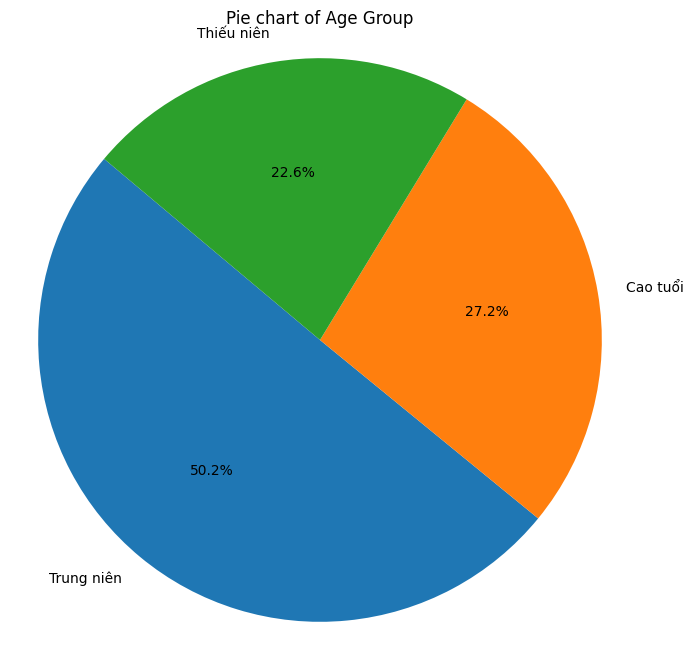

In [2648]:
age_group_counts=problem5_df['Age_Group'].value_counts()
plt.figure(figsize=(8,8))
plt.pie(age_group_counts,labels=age_group_counts.index,autopct='%1.1f%%', startangle=140)
plt.title('Pie chart of Age Group')
plt.axis('equal')
plt.show()

***Trung niên thường là bố mẹ và có tiền rồi, nên đi chợ nhiều cũng đúng thôi***

# Problem 6

In [2649]:
Item_Information

,Name,Origin,Location,Weight (g),Price,NSX,HSD,Marketing strategy,Discount,Rate,Combined_ID
0,Bánh Oreo,Vietnam,Cao,120.0,"17,500 ₫",2023-11-14,2024-10-17,False,10,4,0/0
1,Bánh Chocopie,Vietnam,Cao,396.0,"48,000 ₫",2023-10-07,2024-09-16,False,0,3,0/1
2,Kẹo cao su Cool Air Fresh,Vietnam,Trung bình,40.0,"40,000 ₫",2024-06-02,2026-06-02,False,0,3,0/2
3,Bánh mỳ chà bông Kinh đô,Vietnam,Trung bình,80.0,"13,400 ₫",2024-05-02,2026-05-02,False,0,3,0/3
4,Bánh trứng Custard,Thái Lan,Trung bình,46.0,"17,000 ₫",2023-10-30,2024-04-16,True,10,4,0/4
...,...,...,...,...,...,...,...,...,...,...,...
129,Pizza kitkool,Vietnam,Thấp,140.0,"33,000 ₫",2024-04-16,2024-06-10,False,0,4,7/11
130,Mý ý SG Food,Vietnam,Thấp,250.0,"27,000 ₫",2024-02-05,2024-09-03,False,0,4,7/12
131,Thanh cua Akira,Nhật Bản,Thấp,200.0,"58,500 ₫",2023-10-16,2023-12-19,False,0,4,7/13
132,Nước lẩu Barona,Vietnam,Thấp,180.0,"32,000 ₫",2023-12-02,2024-03-02,False,0,4,7/14


In [2650]:
Item_Information.columns

Index(['Name', 'Origin', 'Location', 'Weight (g)', 'Price', 'NSX', 'HSD',
       'Marketing strategy', 'Discount ', 'Rate', 'Combined_ID'],
      dtype='object')

In [2651]:
Item_Information=Item_Information.rename(columns={'Discount ':'Discount'})

In [2652]:
Customer_Behavior['Combined_ID']=Customer_Behavior['Shelf ID'].astype(str)+'/'+Customer_Behavior['Item ID'].astype(str)

In [2653]:
problem6_df=Item_Information.loc[Item_Information['Discount']>0]
problem6_df=problem6_df['Combined_ID']
sub_pb6_df=Customer_Behavior.loc[Customer_Behavior['Bought']==True]
sub_pb6_df=sub_pb6_df['Combined_ID']
problem6_df=pd.merge(problem6_df,sub_pb6_df,on='Combined_ID',how='inner')
problem6_df['Combined_ID'].value_counts().head()

Combined_ID
0/4     179
2/7     176
7/0     174
1/1     113
1/11    105
Name: count, dtype: int64

***Vậy bánh trứng Custard được mua nhiều nhất trong các mặt hàng đc giảm giá, chắc do ngon***

# Problem 7

In [2654]:
Item_Information.columns

Index(['Name', 'Origin', 'Location', 'Weight (g)', 'Price', 'NSX', 'HSD',
       'Marketing strategy', 'Discount', 'Rate', 'Combined_ID'],
      dtype='object')

In [2655]:
problem7_df=Item_Information.loc[Item_Information['Marketing strategy']==True]
problem7_df=problem7_df['Combined_ID']
sub_pb7_df=Customer_Behavior.loc[Customer_Behavior['Bought']==True]
sub_pb7_df=sub_pb7_df['Combined_ID']
problem7_df=pd.merge(problem7_df,sub_pb7_df,on='Combined_ID',how='inner')
problem7_df['Combined_ID'].value_counts().head()

Combined_ID
0/4     179
2/7     176
7/0     174
1/11    105
1/10     99
Name: count, dtype: int64

***Tiếp tục Custard dẫn đầu, mình cũng thích ăn bánh này***

# Problem 8

In [2656]:
Customer_Behavior.columns

Index(['Shelf ID', 'Person ID', 'Timestamp', 'Age', 'Gender', 'Height',
       'Weight', 'Married status', 'Moving speed (m/s)', 'Item ID',
       'Looking at item (s)', 'Holding the item (s)', 'Holding the bag',
       'Picking up item', 'Returning item', 'Putting item into bag',
       'Taking item out of bag', 'Putting item into bag in the 2nd time',
       'time_to_look_and_hold', 'Age_Group', 'Bought', 'Combined_ID'],
      dtype='object')

In [2657]:
problem8_df=Customer_Behavior[['Shelf ID','time_to_look_and_hold']]
problem8_df.groupby('Shelf ID')['time_to_look_and_hold'].agg(['sum','mean','count'])

,sum,mean,count
Shelf ID,,,
0,153458,55.022589,2789
1,120088,50.820144,2363
2,106461,55.767941,1909
3,77919,59.845622,1302
4,108934,58.005325,1878
5,47380,62.260184,761
6,42914,39.479301,1087
7,201638,61.009985,3305


***Quầy 5, quầy 7 và quầy 3 là 3 quầy được chú ý nhiều nhất, 3 quầy này được xem xét dựa trên số lần tương tác. Có thể hiểu rằng 3 quầy này có lượng quan tâm khá nhiều.***

# Problem 9

In [2658]:
Customer_Behavior.head()

,Shelf ID,Person ID,Timestamp,Age,Gender,Height,Weight,Married status,Moving speed (m/s),Item ID,...,Holding the bag,Picking up item,Returning item,Putting item into bag,Taking item out of bag,Putting item into bag in the 2nd time,time_to_look_and_hold,Age_Group,Bought,Combined_ID
0,4,1,2024-07-06 10:00:00,52,Female,162,41,Married,0.19,16,...,True,True,False,False,False,True,63,Trung niên,False,4/16
1,4,1,2024-07-06 10:02:00,52,Female,162,41,Married,0.49,5,...,True,True,False,True,True,True,39,Trung niên,True,4/5
2,4,1,2024-07-06 10:05:00,52,Female,162,41,Married,0.36,4,...,True,True,True,True,True,False,64,Trung niên,False,4/4
3,4,1,2024-07-06 10:06:00,52,Female,162,41,Married,0.64,8,...,True,True,True,False,False,False,56,Trung niên,False,4/8
4,4,1,2024-07-06 10:08:00,52,Female,162,41,Married,0.13,6,...,True,True,False,False,False,True,43,Trung niên,False,4/6


In [2659]:
problem9_df=Customer_Behavior[Customer_Behavior['Bought']==True]['Shelf ID']
problem9_df

1        4
5        4
7        7
9        7
11       2
        ..
15389    2
15390    3
15391    3
15392    3
15393    3
Name: Shelf ID, Length: 7277, dtype: int64

In [2660]:
problem9_df.value_counts()

Shelf ID
7    1457
1    1336
0    1253
2     930
4     871
3     634
5     420
6     376
Name: count, dtype: int64

***Vậy quầy 7,1,0 sẽ có nhiều số lượng mua nhất***

# Problem 10

In [2661]:
Customer_Behavior.loc[Customer_Behavior['Person ID']==100]

,Shelf ID,Person ID,Timestamp,Age,Gender,Height,Weight,Married status,Moving speed (m/s),Item ID,...,Holding the bag,Picking up item,Returning item,Putting item into bag,Taking item out of bag,Putting item into bag in the 2nd time,time_to_look_and_hold,Age_Group,Bought,Combined_ID
1097,4,100,2024-07-06 22:18:00,56,Male,176,78,Married,1.23,13,...,True,True,True,True,False,False,62,Trung niên,True,4/13
1098,4,100,2024-07-06 22:19:00,56,Male,176,78,Married,0.98,7,...,True,True,False,False,True,False,36,Trung niên,False,4/7
1099,4,100,2024-07-06 22:22:00,56,Male,176,78,Married,0.37,18,...,True,True,False,True,False,False,33,Trung niên,True,4/18
1100,3,100,2024-07-06 22:23:00,56,Male,176,78,Married,0.16,19,...,True,True,False,True,False,False,83,Trung niên,True,3/19
1101,4,100,2024-07-06 22:28:00,56,Male,176,78,Married,1.08,8,...,True,True,True,False,True,False,63,Trung niên,False,4/8
1102,4,100,2024-07-06 22:33:00,56,Male,176,78,Married,0.61,4,...,True,True,True,False,False,True,66,Trung niên,False,4/4
1103,2,100,2024-07-06 22:36:00,56,Male,176,78,Married,0.81,2,...,True,True,True,False,False,False,68,Trung niên,False,2/2
1104,2,100,2024-07-06 22:39:00,56,Male,176,78,Married,0.63,8,...,True,True,False,True,True,True,77,Trung niên,True,2/8
1105,2,100,2024-07-06 22:40:00,56,Male,176,78,Married,0.45,3,...,True,True,False,False,True,False,40,Trung niên,False,2/3
1106,2,100,2024-07-06 22:44:00,56,Male,176,78,Married,1.33,8,...,True,True,False,True,True,True,44,Trung niên,True,2/8


***Các khách hàng di chuyển theo thời gian, có thể là như vậy, nên chúng ta cần chuyển timestamp sang dạng số rồi so sánh, sau khi so sánh sẽ lấy shelf ID tương ứng và gắn thành 1 dãy, rồi tách ra thành 2 chữ số 1, tạo 1 dataframe như thế, xong tìm các giá trị lớn nhất là xong. Lúc đầu có location_x, location_y, tôi nghĩ phải xây dựng 1 graph để vẽ quy tắc di chuyển nhưng có vẻ nó sẽ không phức tạp như thế***

In [2662]:
problem10_df=Customer_Behavior[['Shelf ID','Person ID','Timestamp']]

In [2663]:
problem10_df

,Shelf ID,Person ID,Timestamp
0,4,1,2024-07-06 10:00:00
1,4,1,2024-07-06 10:02:00
2,4,1,2024-07-06 10:05:00
3,4,1,2024-07-06 10:06:00
4,4,1,2024-07-06 10:08:00
...,...,...,...
15389,2,1500,2024-07-05 03:49:00
15390,3,1500,2024-07-05 03:54:00
15391,3,1500,2024-07-05 03:56:00
15392,3,1500,2024-07-05 03:58:00


In [2664]:
problem10_df['Timestamp'] = pd.to_datetime(problem10_df['Timestamp'])
problem10_df['Time_in_seconds'] = (problem10_df['Timestamp'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')

/tmp/ipykernel_36/2113726703.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  problem10_df['Timestamp'] = pd.to_datetime(problem10_df['Timestamp'])
/tmp/ipykernel_36/2113726703.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  problem10_df['Time_in_seconds'] = (problem10_df['Timestamp'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')


In [2665]:
problem10_df.drop(columns='Timestamp')

,Shelf ID,Person ID,Time_in_seconds
0,4,1,1720260000
1,4,1,1720260120
2,4,1,1720260300
3,4,1,1720260360
4,4,1,1720260480
...,...,...,...
15389,2,1500,1720151340
15390,3,1500,1720151640
15391,3,1500,1720151760
15392,3,1500,1720151880


In [2666]:
problem10_df = problem10_df.sort_values(by=['Person ID', 'Time_in_seconds'])

In [2667]:
problem10_df

,Shelf ID,Person ID,Timestamp,Time_in_seconds
0,4,1,2024-07-06 10:00:00,1720260000
1,4,1,2024-07-06 10:02:00,1720260120
2,4,1,2024-07-06 10:05:00,1720260300
3,4,1,2024-07-06 10:06:00,1720260360
4,4,1,2024-07-06 10:08:00,1720260480
...,...,...,...,...
15389,2,1500,2024-07-05 03:49:00,1720151340
15390,3,1500,2024-07-05 03:54:00,1720151640
15391,3,1500,2024-07-05 03:56:00,1720151760
15392,3,1500,2024-07-05 03:58:00,1720151880


In [2668]:
grouped_person=problem10_df.groupby('Person ID')

In [2669]:
from collections import Counter
movements=[]
for person_id,group in grouped_person:
    shelf_movements = group['Shelf ID'].tolist()
    movement_pairs = [(shelf_movements[i],shelf_movements[i+1]) if (shelf_movements[i] != shelf_movements[i+1]) else None for i in range(len(shelf_movements)-1)]
    movement_count=Counter(movement_pairs)
    for movement, count in movement_count.items():
        movements.append({'Person ID': person_id, 'Movement': movement, 'Frequency': count})
        
movement_df=pd.DataFrame(movements)
movement_df=movement_df.sort_values(by='Frequency',ascending=False)


movement_df

,Person ID,Movement,Frequency
2661,990,None,24
2063,761,None,22
316,121,None,21
3643,1383,None,21
2039,753,None,21
...,...,...,...
2154,794,"(2, 3)",1
2156,795,"(5, 3)",1
813,304,"(2, 4)",1
2158,796,"(3, 1)",1


In [2670]:
movement_df=movement_df.dropna(subset=['Movement'])
movement_df

,Person ID,Movement,Frequency
3744,1420,"(4, 7)",2
2789,1042,"(7, 4)",2
1641,604,"(4, 0)",2
3393,1282,"(0, 2)",2
3394,1282,"(2, 0)",2
...,...,...,...
2154,794,"(2, 3)",1
2156,795,"(5, 3)",1
813,304,"(2, 4)",1
2158,796,"(3, 1)",1


In [2671]:
movement_df['Movement']=movement_df['Movement'].apply(lambda x: (min(x),max(x)) if x is not None else None)
# movement_df.groupby('Movement')['Frequency'].agg('sum')


/tmp/ipykernel_36/2550463122.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movement_df['Movement']=movement_df['Movement'].apply(lambda x: (min(x),max(x)) if x is not None else None)


In [2672]:
movement_df

,Person ID,Movement,Frequency
3744,1420,"(4, 7)",2
2789,1042,"(4, 7)",2
1641,604,"(0, 4)",2
3393,1282,"(0, 2)",2
3394,1282,"(0, 2)",2
...,...,...,...
2154,794,"(2, 3)",1
2156,795,"(3, 5)",1
813,304,"(2, 4)",1
2158,796,"(1, 3)",1


In [2673]:
movement_df.groupby('Movement')['Frequency'].agg('sum')

Movement
(0, 1)    147
(0, 2)    142
(0, 3)    106
(0, 4)    109
(0, 5)     45
(0, 6)     83
(0, 7)    232
(1, 2)    117
(1, 3)     69
(1, 4)    124
(1, 5)     58
(1, 6)     67
(1, 7)    196
(2, 3)     62
(2, 4)     91
(2, 5)     38
(2, 6)     51
(2, 7)    156
(3, 4)     60
(3, 5)     29
(3, 6)     30
(3, 7)     94
(4, 5)     36
(4, 6)     53
(4, 7)    172
(5, 6)     20
(5, 7)     74
(6, 7)     68
Name: Frequency, dtype: int64

***Vậy di chuyển từ dãy 0 sang dãy 1 là nhiều nhất***

# Problem 11

In [2674]:
Item_Information.loc[Item_Information['Name']=='Bánh trứng Custard']

,Name,Origin,Location,Weight (g),Price,NSX,HSD,Marketing strategy,Discount,Rate,Combined_ID
4,Bánh trứng Custard,Thái Lan,Trung bình,46.0,"17,000 ₫",2023-10-30,2024-04-16,True,10,4,0/4


In [2675]:
problem11_df=Customer_Behavior.groupby('Combined_ID')['Bought']

In [2676]:
problem11_df=problem11_df.value_counts().reset_index(name='Count')

In [2677]:

pivot_df = pd.pivot_table(data=problem11_df,index='Combined_ID', 
                            columns='Bought', 
                            values='Count', 
                            fill_value=0).reset_index()

pivot_df.columns = ['Combined_ID', 'Not_Bought', 'Bought']

print(pivot_df)

    Combined_ID  Not_Bought  Bought
0           0/0       124.0    83.0
1           0/1       127.0    93.0
2          0/10       113.0    78.0
3          0/11       131.0    97.0
4          0/12       111.0    82.0
..          ...         ...     ...
129         7/5       112.0    74.0
130         7/6       115.0    95.0
131         7/7       118.0    92.0
132         7/8       107.0    86.0
133         7/9       120.0    81.0

[134 rows x 3 columns]


In [2678]:
problem11_df=pd.merge(pivot_df,Item_Information,on='Combined_ID',how='inner')

In [2679]:
problem11_df

,Combined_ID,Not_Bought,Bought,Name,Origin,Location,Weight (g),Price,NSX,HSD,Marketing strategy,Discount,Rate
0,0/0,124.0,83.0,Bánh Oreo,Vietnam,Cao,120.0,"17,500 ₫",2023-11-14,2024-10-17,False,10,4
1,0/1,127.0,93.0,Bánh Chocopie,Vietnam,Cao,396.0,"48,000 ₫",2023-10-07,2024-09-16,False,0,3
2,0/10,113.0,78.0,Kẹo dẻo Alphelibe,Vietnam,Thấp,73.5,"15,300 ₫",2023-08-22,2024-08-22,False,15,3
3,0/11,131.0,97.0,Thạch rau câu Đức Hạnh,Vietnam,Thấp,320.0,"30,500 ₫",2023-12-31,2024-09-30,False,0,4
4,0/12,111.0,82.0,Kẹo Haribo charshmallows,Vietnam,Thấp,70.0,"28,500 ₫",2023-10-30,2024-07-06,False,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,7/5,112.0,74.0,Sữa chua Ba vì,Vietnam,Trung bình,100.0,"20,000 ₫",2024-06-18,2025-05-29,False,0,4
130,7/6,115.0,95.0,Sữa chua uống Yakult,Vietnam,Trung bình,65.0,"26,000 ₫",2024-03-26,2024-09-18,False,0,3
131,7/7,118.0,92.0,Sữa chua uống Probi,Vietnam,Trung bình,130.0,"36,000 ₫",2024-02-16,2024-08-28,False,5,5
132,7/8,107.0,86.0,Sữa chua Susu,Vietnam,Trung bình,80.0,"25,000 ₫",2023-09-21,2023-11-30,False,0,3


***Cần 1 trường dữ liệu biểu thị việc mua hay không mua***

In [2680]:
problem11_df['Ratio_of_Bought']=problem11_df['Bought']/(problem11_df['Bought']+problem11_df['Not_Bought'])

In [2681]:
problem11_df

,Combined_ID,Not_Bought,Bought,Name,Origin,Location,Weight (g),Price,NSX,HSD,Marketing strategy,Discount,Rate,Ratio_of_Bought
0,0/0,124.0,83.0,Bánh Oreo,Vietnam,Cao,120.0,"17,500 ₫",2023-11-14,2024-10-17,False,10,4,0.400966
1,0/1,127.0,93.0,Bánh Chocopie,Vietnam,Cao,396.0,"48,000 ₫",2023-10-07,2024-09-16,False,0,3,0.422727
2,0/10,113.0,78.0,Kẹo dẻo Alphelibe,Vietnam,Thấp,73.5,"15,300 ₫",2023-08-22,2024-08-22,False,15,3,0.408377
3,0/11,131.0,97.0,Thạch rau câu Đức Hạnh,Vietnam,Thấp,320.0,"30,500 ₫",2023-12-31,2024-09-30,False,0,4,0.425439
4,0/12,111.0,82.0,Kẹo Haribo charshmallows,Vietnam,Thấp,70.0,"28,500 ₫",2023-10-30,2024-07-06,False,0,3,0.424870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,7/5,112.0,74.0,Sữa chua Ba vì,Vietnam,Trung bình,100.0,"20,000 ₫",2024-06-18,2025-05-29,False,0,4,0.397849
130,7/6,115.0,95.0,Sữa chua uống Yakult,Vietnam,Trung bình,65.0,"26,000 ₫",2024-03-26,2024-09-18,False,0,3,0.452381
131,7/7,118.0,92.0,Sữa chua uống Probi,Vietnam,Trung bình,130.0,"36,000 ₫",2024-02-16,2024-08-28,False,5,5,0.438095
132,7/8,107.0,86.0,Sữa chua Susu,Vietnam,Trung bình,80.0,"25,000 ₫",2023-09-21,2023-11-30,False,0,3,0.445596


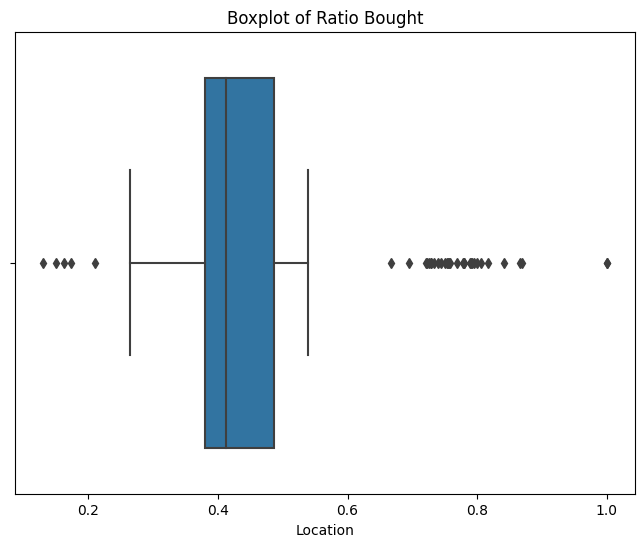

In [2682]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Ratio_of_Bought', data=problem11_df)

# Đặt tiêu đề và nhãn
plt.title('Boxplot of Ratio Bought')
plt.xlabel('Location')
plt.show()

In [2683]:
problem11_df['Ratio_of_Bought'] = pd.qcut(problem11_df['Ratio_of_Bought'], 
                                        q=3, 
                                        labels=['Low', 'Medium', 'High'])

In [2684]:
problem11_df

,Combined_ID,Not_Bought,Bought,Name,Origin,Location,Weight (g),Price,NSX,HSD,Marketing strategy,Discount,Rate,Ratio_of_Bought
0,0/0,124.0,83.0,Bánh Oreo,Vietnam,Cao,120.0,"17,500 ₫",2023-11-14,2024-10-17,False,10,4,Medium
1,0/1,127.0,93.0,Bánh Chocopie,Vietnam,Cao,396.0,"48,000 ₫",2023-10-07,2024-09-16,False,0,3,Medium
2,0/10,113.0,78.0,Kẹo dẻo Alphelibe,Vietnam,Thấp,73.5,"15,300 ₫",2023-08-22,2024-08-22,False,15,3,Medium
3,0/11,131.0,97.0,Thạch rau câu Đức Hạnh,Vietnam,Thấp,320.0,"30,500 ₫",2023-12-31,2024-09-30,False,0,4,Medium
4,0/12,111.0,82.0,Kẹo Haribo charshmallows,Vietnam,Thấp,70.0,"28,500 ₫",2023-10-30,2024-07-06,False,0,3,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,7/5,112.0,74.0,Sữa chua Ba vì,Vietnam,Trung bình,100.0,"20,000 ₫",2024-06-18,2025-05-29,False,0,4,Medium
130,7/6,115.0,95.0,Sữa chua uống Yakult,Vietnam,Trung bình,65.0,"26,000 ₫",2024-03-26,2024-09-18,False,0,3,High
131,7/7,118.0,92.0,Sữa chua uống Probi,Vietnam,Trung bình,130.0,"36,000 ₫",2024-02-16,2024-08-28,False,5,5,Medium
132,7/8,107.0,86.0,Sữa chua Susu,Vietnam,Trung bình,80.0,"25,000 ₫",2023-09-21,2023-11-30,False,0,3,High


/tmp/ipykernel_36/1664407388.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  heatmap_data = problem11_df.groupby(['Location', 'Ratio_of_Bought']).size().unstack(fill_value=0)


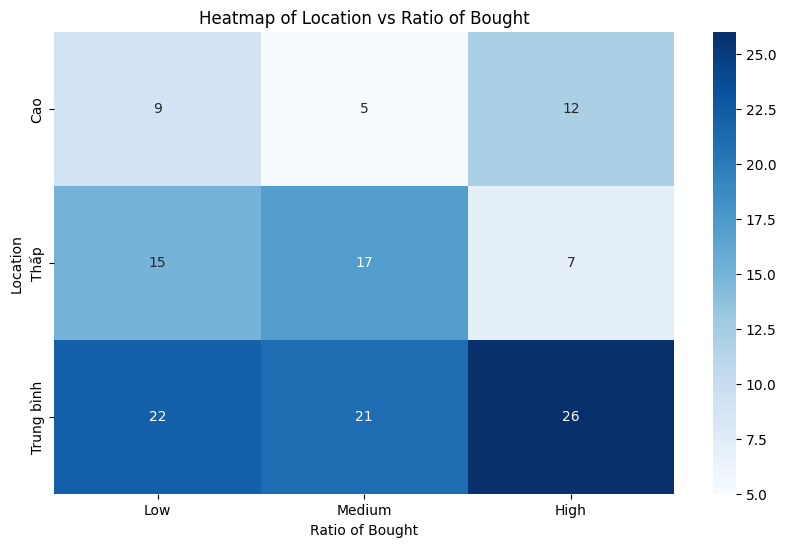

In [2685]:
heatmap_data = problem11_df.groupby(['Location', 'Ratio_of_Bought']).size().unstack(fill_value=0)

# Tạo biểu đồ heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='Blues', fmt='g')

# Thêm tiêu đề và nhãn
plt.title('Heatmap of Location vs Ratio of Bought')
plt.xlabel('Ratio of Bought')
plt.ylabel('Location')

# Hiển thị biểu đồ
plt.show()

# Problem 12

/tmp/ipykernel_36/812159145.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  heatmap_data = problem11_df.groupby(['Discount', 'Ratio_of_Bought']).size().unstack(fill_value=0)


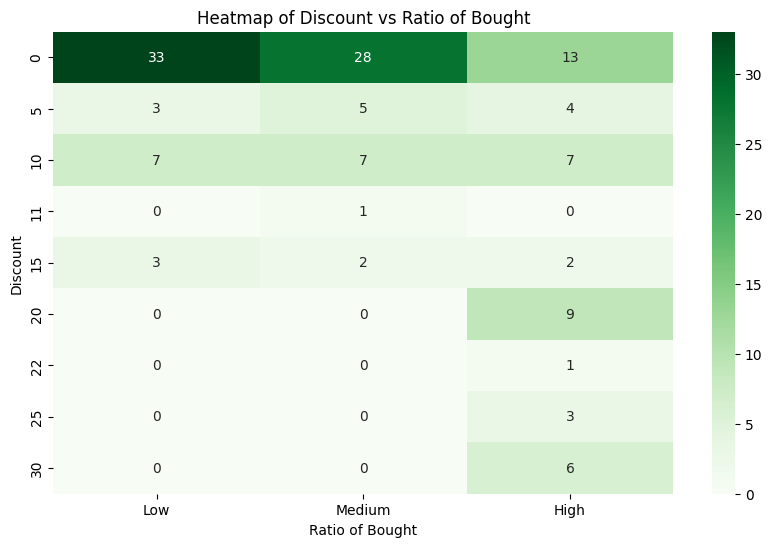

In [2686]:
heatmap_data = problem11_df.groupby(['Discount', 'Ratio_of_Bought']).size().unstack(fill_value=0)

# Tạo biểu đồ heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='Greens', fmt='g')

# Thêm tiêu đề và nhãn
plt.title('Heatmap of Discount vs Ratio of Bought')
plt.xlabel('Ratio of Bought')
plt.ylabel('Discount')

# Hiển thị biểu đồ
plt.show()

/tmp/ipykernel_36/3088771328.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  heatmap_data = problem11_df.groupby(['Marketing strategy', 'Ratio_of_Bought']).size().unstack(fill_value=0)


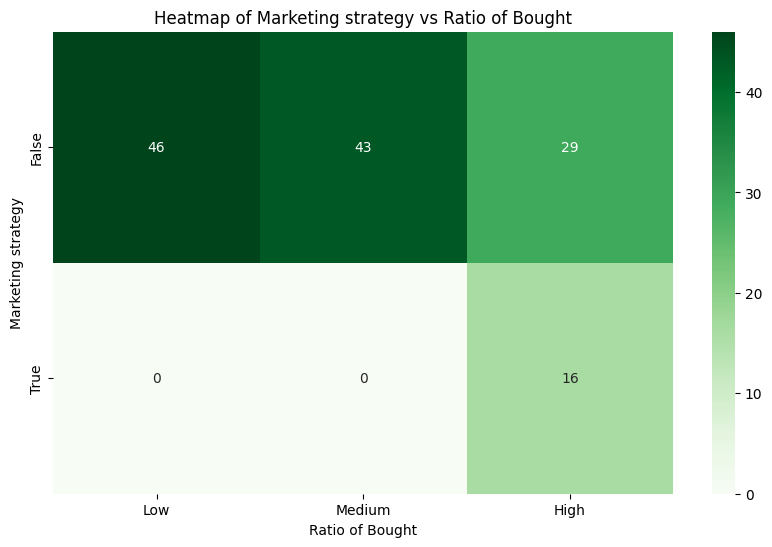

In [2687]:
heatmap_data = problem11_df.groupby(['Marketing strategy', 'Ratio_of_Bought']).size().unstack(fill_value=0)

# Tạo biểu đồ heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='Greens', fmt='g')

# Thêm tiêu đề và nhãn
plt.title('Heatmap of Marketing strategy vs Ratio of Bought')
plt.xlabel('Ratio of Bought')
plt.ylabel('Marketing strategy')

# Hiển thị biểu đồ
plt.show()

# Xử lý nốt dữ liệu

Nên giữ lại các cột Shelf_Information và Item_Information. Vì đây là dữ liệu bất biến. Còn các dữ liệu trong Customer_Behavior_Data cần thay đổi 1 chút.

In [2688]:
Shelf_Information

,Shelf ID,Description,Location_x (center),Location_y (center),Width,Height,Length,Number of items,Shape
0,0,Quầy bánh kẹo,1100,550,300,180,300,13,Quầy tròn
1,1,Quầy hoá mỹ phẩm,350,500,100,180,400,18,Kệ hàng
2,2,Quầy sữa,600,400,100,180,600,9,Kệ hàng
3,3,Quầy thực phẩm,1450,400,100,180,600,25,Kệ hàng
4,4,Quầy gia vị,1100,150,500,180,100,19,Kệ hàng
5,5,Quầy gia dụng,350,950,700,180,100,16,Kệ hàng
6,6,Quầy sách và đồ chơi,50,400,100,180,600,16,Kệ hàng
7,7,Quầy đông lạnh,1150,950,700,180,100,16,Kệ hàng


In [2689]:
Item_Information.columns

Index(['Name', 'Origin', 'Location', 'Weight (g)', 'Price', 'NSX', 'HSD',
       'Marketing strategy', 'Discount', 'Rate', 'Combined_ID'],
      dtype='object')

In [2690]:
col_move=Item_Information.pop('Combined_ID')
Item_Information.insert(0,'Combined_ID',col_move)
Item_Information.rename(columns={'Combined_ID':'Shelf ID/Item ID'},inplace=True)
Item_Information

,Shelf ID/Item ID,Name,Origin,Location,Weight (g),Price,NSX,HSD,Marketing strategy,Discount,Rate
0,0/0,Bánh Oreo,Vietnam,Cao,120.0,"17,500 ₫",2023-11-14,2024-10-17,False,10,4
1,0/1,Bánh Chocopie,Vietnam,Cao,396.0,"48,000 ₫",2023-10-07,2024-09-16,False,0,3
2,0/2,Kẹo cao su Cool Air Fresh,Vietnam,Trung bình,40.0,"40,000 ₫",2024-06-02,2026-06-02,False,0,3
3,0/3,Bánh mỳ chà bông Kinh đô,Vietnam,Trung bình,80.0,"13,400 ₫",2024-05-02,2026-05-02,False,0,3
4,0/4,Bánh trứng Custard,Thái Lan,Trung bình,46.0,"17,000 ₫",2023-10-30,2024-04-16,True,10,4
...,...,...,...,...,...,...,...,...,...,...,...
129,7/11,Pizza kitkool,Vietnam,Thấp,140.0,"33,000 ₫",2024-04-16,2024-06-10,False,0,4
130,7/12,Mý ý SG Food,Vietnam,Thấp,250.0,"27,000 ₫",2024-02-05,2024-09-03,False,0,4
131,7/13,Thanh cua Akira,Nhật Bản,Thấp,200.0,"58,500 ₫",2023-10-16,2023-12-19,False,0,4
132,7/14,Nước lẩu Barona,Vietnam,Thấp,180.0,"32,000 ₫",2023-12-02,2024-03-02,False,0,4


In [2691]:
Item_Information.to_csv('Item_Information',index=False)

In [2692]:
Customer_Behavior.drop(columns='Item ID')
Customer_Behavior.drop(columns='Shelf ID')

,Person ID,Timestamp,Age,Gender,Height,Weight,Married status,Moving speed (m/s),Item ID,Looking at item (s),...,Holding the bag,Picking up item,Returning item,Putting item into bag,Taking item out of bag,Putting item into bag in the 2nd time,time_to_look_and_hold,Age_Group,Bought,Combined_ID
0,1,2024-07-06 10:00:00,52,Female,162,41,Married,0.19,16,27,...,True,True,False,False,False,True,63,Trung niên,False,4/16
1,1,2024-07-06 10:02:00,52,Female,162,41,Married,0.49,5,22,...,True,True,False,True,True,True,39,Trung niên,True,4/5
2,1,2024-07-06 10:05:00,52,Female,162,41,Married,0.36,4,25,...,True,True,True,True,True,False,64,Trung niên,False,4/4
3,1,2024-07-06 10:06:00,52,Female,162,41,Married,0.64,8,21,...,True,True,True,False,False,False,56,Trung niên,False,4/8
4,1,2024-07-06 10:08:00,52,Female,162,41,Married,0.13,6,27,...,True,True,False,False,False,True,43,Trung niên,False,4/6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15389,1500,2024-07-05 03:49:00,52,Female,154,44,Single,0.52,4,32,...,False,True,False,False,False,False,67,Trung niên,True,2/4
15390,1500,2024-07-05 03:54:00,52,Female,154,44,Single,0.85,3,30,...,False,True,False,False,False,False,58,Trung niên,True,3/3
15391,1500,2024-07-05 03:56:00,52,Female,154,44,Single,0.76,21,54,...,False,True,False,False,False,False,110,Trung niên,True,3/21
15392,1500,2024-07-05 03:58:00,52,Female,154,44,Single,1.41,13,16,...,False,True,False,False,False,False,41,Trung niên,True,3/13


In [2693]:
col_move_2=Customer_Behavior.pop('Age_Group')
Customer_Behavior.insert(5,'Age_Group',col_move_2)

In [2694]:
col_move=Customer_Behavior.pop('Combined_ID')
Customer_Behavior.insert(1,'Combined_ID',col_move)

In [2695]:
Customer_Behavior.rename(columns={'Combined_ID':'Shelf ID/Item ID'},inplace=True)
Customer_Behavior.rename(columns={'time_to_look_and_hold':'Time for Thinking about item'},inplace=True)
Customer_Behavior

,Shelf ID,Shelf ID/Item ID,Person ID,Timestamp,Age,Gender,Age_Group,Height,Weight,Married status,...,Looking at item (s),Holding the item (s),Holding the bag,Picking up item,Returning item,Putting item into bag,Taking item out of bag,Putting item into bag in the 2nd time,Time for Thinking about item,Bought
0,4,4/16,1,2024-07-06 10:00:00,52,Female,Trung niên,162,41,Married,...,27,36,True,True,False,False,False,True,63,False
1,4,4/5,1,2024-07-06 10:02:00,52,Female,Trung niên,162,41,Married,...,22,17,True,True,False,True,True,True,39,True
2,4,4/4,1,2024-07-06 10:05:00,52,Female,Trung niên,162,41,Married,...,25,39,True,True,True,True,True,False,64,False
3,4,4/8,1,2024-07-06 10:06:00,52,Female,Trung niên,162,41,Married,...,21,35,True,True,True,False,False,False,56,False
4,4,4/6,1,2024-07-06 10:08:00,52,Female,Trung niên,162,41,Married,...,27,16,True,True,False,False,False,True,43,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15389,2,2/4,1500,2024-07-05 03:49:00,52,Female,Trung niên,154,44,Single,...,32,35,False,True,False,False,False,False,67,True
15390,3,3/3,1500,2024-07-05 03:54:00,52,Female,Trung niên,154,44,Single,...,30,28,False,True,False,False,False,False,58,True
15391,3,3/21,1500,2024-07-05 03:56:00,52,Female,Trung niên,154,44,Single,...,54,56,False,True,False,False,False,False,110,True
15392,3,3/13,1500,2024-07-05 03:58:00,52,Female,Trung niên,154,44,Single,...,16,25,False,True,False,False,False,False,41,True


In [2696]:
Customer_Behavior = pd.merge(Item_Information,Customer_Behavior,on=['Shelf ID/Item ID'],how='inner')

In [2697]:
Customer_Behavior.to_csv('Customer_Behavior_Overview',index=False)

In [2698]:
Customer_Behavior

,Shelf ID/Item ID,Name,Origin,Location,Weight (g),Price,NSX,HSD,Marketing strategy,Discount,...,Looking at item (s),Holding the item (s),Holding the bag,Picking up item,Returning item,Putting item into bag,Taking item out of bag,Putting item into bag in the 2nd time,Time for Thinking about item,Bought
0,0/0,Bánh Oreo,Vietnam,Cao,120.0,"17,500 ₫",2023-11-14,2024-10-17,False,10,...,15,30,False,True,False,False,False,False,45,True
1,0/0,Bánh Oreo,Vietnam,Cao,120.0,"17,500 ₫",2023-11-14,2024-10-17,False,10,...,20,36,False,True,True,False,False,False,56,True
2,0/0,Bánh Oreo,Vietnam,Cao,120.0,"17,500 ₫",2023-11-14,2024-10-17,False,10,...,28,17,True,True,False,False,False,True,45,False
3,0/0,Bánh Oreo,Vietnam,Cao,120.0,"17,500 ₫",2023-11-14,2024-10-17,False,10,...,28,20,True,True,False,False,False,False,48,False
4,0/0,Bánh Oreo,Vietnam,Cao,120.0,"17,500 ₫",2023-11-14,2024-10-17,False,10,...,20,17,True,True,True,True,False,False,37,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15389,7/15,Xúc xích CP,Vietnam,Thấp,450.0,"94,000 ₫",2024-02-21,2024-05-23,False,0,...,39,39,True,True,False,False,True,False,78,False
15390,7/15,Xúc xích CP,Vietnam,Thấp,450.0,"94,000 ₫",2024-02-21,2024-05-23,False,0,...,39,33,True,True,False,True,False,True,72,True
15391,7/15,Xúc xích CP,Vietnam,Thấp,450.0,"94,000 ₫",2024-02-21,2024-05-23,False,0,...,28,23,True,True,True,True,True,False,51,False
15392,7/15,Xúc xích CP,Vietnam,Thấp,450.0,"94,000 ₫",2024-02-21,2024-05-23,False,0,...,20,38,True,True,False,True,False,False,58,True
